In [ ]:
### Intro to AI Group 3 Final Project - Using CV to Predict Ocular Disease

In [2]:
train_base_dir = "C:\\Users\\elanw\\OneDrive\\Documents\\IntroToAI\\ocular_dataset\\train"
valid_base_dir = "C:\\Users\\elanw\\OneDrive\\Documents\\IntroToAI\\ocular_dataset\\valid"
test_base_dir = "C:\\Users\\elanw\\OneDrive\\Documents\\IntroToAI\\ocular_dataset\\test"
image_dir = "C:\\Users\\elanw\\OneDrive\\Documents\\IntroToAI\\ocular_dataset\\preprocessed_images\\"

In [24]:
# Set up the base model

import keras
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet',
                   input_shape=(224, 224, 1),
                   include_top=False)
base_model.trainable = True

ValueError: The input must have 3 channels; Received `input_shape=(224, 224, 1)`

In [4]:
# add 2 dense layers and a prediction layer to the base model

from tensorflow.keras import models, layers
flatten_layer = layers.Flatten()
dense_layer = layers.Dense(80, activation='relu')
dense_layer2 = layers.Dense(40, activation='relu')
prediction_layer = layers.Dense(8, activation='softmax')

xfer_vgg19_model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer,
    dense_layer2,
    prediction_layer
])

In [18]:
# Compile the model
# tried adam, seeing if sgd is better
from tensorflow.keras.optimizers import SGD
xfer_vgg19_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [12]:
# Set up Image Data Generators for train, valid & test
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip=False, vertical_flip=False, validation_split=0.2)

In [22]:
# Flow images from directories with label data
# batch size of 20 seems roughly optimal
train_it = train_datagen.flow_from_directory(train_base_dir, target_size=(224, 224), color_mode='rgb', class_mode='sparse', batch_size=32, subset='training', shuffle=False)
valid_it = train_datagen.flow_from_directory(train_base_dir, target_size=(224, 224), color_mode='rgb', class_mode='sparse', batch_size=32, subset='validation', shuffle = False)
# changing from sparse to categorical

Found 5117 images belonging to 8 classes.
Found 1275 images belonging to 8 classes.


In [23]:
#vgg 16 w/ adam w/ one sided colored data
xfer_vgg19_model.fit(train_it, epochs=11, validation_data=valid_it)

Epoch 1/11


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/vgg16/block1_conv1/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "c:\Users\elanw\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\elanw\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\elanw\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "c:\Users\elanw\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\elanw\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\elanw\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Users\elanw\anaconda3\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "c:\Users\elanw\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "c:\Users\elanw\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "c:\Users\elanw\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "c:\Users\elanw\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\elanw\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\elanw\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\elanw\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\elanw\AppData\Local\Temp\ipykernel_15988\3014524255.py", line 2, in <module>
      xfer_vgg19_model.fit(train_it, epochs=11, validation_data=valid_it)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\activations.py", line 321, in relu
      return backend.relu(
    File "c:\Users\elanw\anaconda3\Lib\site-packages\keras\src\backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential/vgg16/block1_conv1/Relu'
input depth must be evenly divisible by filter depth: 1 vs 3
	 [[{{node sequential/vgg16/block1_conv1/Relu}}]] [Op:__inference_train_function_13412]

In [90]:
# Fit the model
# highest yet is 45% validation accuracy
# manually set learning rate to .01
xfer_vgg19_model.fit(train_it, epochs=18, validation_data=valid_it)
# color

Epoch 1/18
160/160 [==============================] - 517s 3s/step - loss: 1.6711 - accuracy: 0.3342 - val_loss: 1.6644 - val_accuracy: 0.3286
Epoch 2/18
160/160 [==============================] - 1262s 8s/step - loss: 1.6470 - accuracy: 0.3324 - val_loss: 1.6505 - val_accuracy: 0.3278
Epoch 3/18
160/160 [==============================] - 502s 3s/step - loss: 1.6352 - accuracy: 0.3328 - val_loss: 1.6424 - val_accuracy: 0.3294
Epoch 4/18
160/160 [==============================] - 506s 3s/step - loss: 1.6301 - accuracy: 0.3334 - val_loss: 1.6389 - val_accuracy: 0.3325
Epoch 5/18
 70/160 [============>.................] - ETA: 3:50 - loss: 1.6048 - accuracy: 0.3366

KeyboardInterrupt: 

In [94]:
# Fit the model
# default 'sgd'
# learning rate of .1
xfer_vgg19_model.fit(train_it, epochs=18, validation_data=valid_it)
# color

Epoch 1/18


KeyboardInterrupt: 

In [86]:
# Fit the model
# default 'sgd'
# highest yet is 45% validation accuracy
xfer_vgg19_model.fit(train_it, epochs=18, validation_data=valid_it)
# color

Epoch 1/18
160/160 [==============================] - 604s 4s/step - loss: 2.7094 - accuracy: 0.3094 - val_loss: 1.8964 - val_accuracy: 0.3294
Epoch 2/18
160/160 [==============================] - 618s 4s/step - loss: 1.8251 - accuracy: 0.3326 - val_loss: 1.7741 - val_accuracy: 0.3294
Epoch 3/18
160/160 [==============================] - 614s 4s/step - loss: 1.7287 - accuracy: 0.3334 - val_loss: 1.7080 - val_accuracy: 0.3302
Epoch 4/18
 43/160 [=======>......................] - ETA: 5:58 - loss: 1.6793 - accuracy: 0.3721

KeyboardInterrupt: 

In [83]:
# Fit the model
# highest yet is 45% validation accuracy
xfer_vgg19_model.fit(train_it, epochs=18, validation_data=valid_it)
# color

Epoch 1/18
160/160 [==============================] - 506s 3s/step - loss: 3.9185 - accuracy: 0.3742 - val_loss: 2.6440 - val_accuracy: 0.3733
Epoch 2/18
160/160 [==============================] - 661s 4s/step - loss: 1.4981 - accuracy: 0.5290 - val_loss: 2.4782 - val_accuracy: 0.3584
Epoch 3/18
160/160 [==============================] - 523s 3s/step - loss: 1.0155 - accuracy: 0.6359 - val_loss: 2.7971 - val_accuracy: 0.2776
Epoch 4/18
160/160 [==============================] - 526s 3s/step - loss: 0.7306 - accuracy: 0.7334 - val_loss: 2.2290 - val_accuracy: 0.4110
Epoch 5/18
160/160 [==============================] - 539s 3s/step - loss: 0.6125 - accuracy: 0.7760 - val_loss: 2.2187 - val_accuracy: 0.4102
Epoch 6/18
160/160 [==============================] - 540s 3s/step - loss: 0.5000 - accuracy: 0.8141 - val_loss: 2.5482 - val_accuracy: 0.3600
Epoch 7/18
160/160 [==============================] - 533s 3s/step - loss: 0.4278 - accuracy: 0.8362 - val_loss: 2.6395 - val_accuracy: 0.3725

In [78]:
# Fit the model
# highest yet is 45% validation accuracy
xfer_vgg19_model.fit(train_it, epochs=17, validation_data=valid_it)
# color

Epoch 1/17
160/160 [==============================] - 522s 3s/step - loss: 4.0796 - accuracy: 0.3498 - val_loss: 2.1048 - val_accuracy: 0.4141
Epoch 2/17
160/160 [==============================] - 1535s 10s/step - loss: 1.2874 - accuracy: 0.5382 - val_loss: 1.9431 - val_accuracy: 0.3396
Epoch 3/17
160/160 [==============================] - 591s 4s/step - loss: 1.0074 - accuracy: 0.6199 - val_loss: 1.8931 - val_accuracy: 0.3537
Epoch 4/17
160/160 [==============================] - 596s 4s/step - loss: 0.7931 - accuracy: 0.7041 - val_loss: 2.1338 - val_accuracy: 0.3678
Epoch 5/17
160/160 [==============================] - 577s 4s/step - loss: 0.6442 - accuracy: 0.7575 - val_loss: 2.0913 - val_accuracy: 0.4165
Epoch 6/17
160/160 [==============================] - 589s 4s/step - loss: 0.5161 - accuracy: 0.8081 - val_loss: 2.2730 - val_accuracy: 0.4078
Epoch 7/17
160/160 [==============================] - 648s 4s/step - loss: 0.4685 - accuracy: 0.8251 - val_loss: 2.5131 - val_accuracy: 0.34

KeyboardInterrupt: 

In [68]:
# Fit the model
# highest yet is 45% validation accuracy
# black and white
xfer_vgg19_model.fit(train_it, epochs=17, validation_data=valid_it)

Epoch 1/17
160/160 [==============================] - 524s 3s/step - loss: 3.1930 - accuracy: 0.3709 - val_loss: 2.1799 - val_accuracy: 0.4314
Epoch 2/17
160/160 [==============================] - 746s 5s/step - loss: 1.3316 - accuracy: 0.5150 - val_loss: 2.0153 - val_accuracy: 0.3851
Epoch 3/17
160/160 [==============================] - 981s 6s/step - loss: 1.0552 - accuracy: 0.6068 - val_loss: 2.0825 - val_accuracy: 0.3992
Epoch 4/17
160/160 [==============================] - 534s 3s/step - loss: 0.8969 - accuracy: 0.6697 - val_loss: 2.1464 - val_accuracy: 0.3365
Epoch 5/17
160/160 [==============================] - 535s 3s/step - loss: 0.8082 - accuracy: 0.6920 - val_loss: 2.1293 - val_accuracy: 0.4322
Epoch 6/17
160/160 [==============================] - 575s 4s/step - loss: 0.7238 - accuracy: 0.7293 - val_loss: 2.2432 - val_accuracy: 0.3576
Epoch 7/17
160/160 [==============================] - 527s 3s/step - loss: 0.6638 - accuracy: 0.7512 - val_loss: 2.2226 - val_accuracy: 0.3741

KeyboardInterrupt: 

In [115]:
#trainable vgg16
xfer_vgg19_model.fit(train_it, epochs=17, validation_data=valid_it)

Epoch 1/17
  1/160 [..............................] - ETA: 36:12 - loss: 9.1531 - accuracy: 0.0312

KeyboardInterrupt: 

In [ ]:
dnn_model = keras.models.Sequential()
input_shape=(224, 224, 3)
dnn_model.add(K.layers.Dense(units=400, input_dim=784,
  activation='relu'))
dnn_model.add(K.layers.Dense(units=400,
  activation='relu'))
dnn_model.add(K.layers.Dense(units=10, activation='softmax'))
dnn_model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop', metrics=['accuracy'])

In [104]:
# Show the accuracy score

from sklearn.metrics import accuracy_score
predictions = xfer_vgg19_model.predict(valid_it)
score = accuracy_score(y_true=valid_it.labels, y_pred=predictions.argmax(axis=-1))
print(predictions)


40/40 [==============================] - 89s 2s/step
[[3.7351740e-06 4.4693118e-07 1.1510168e-02 ... 9.0269416e-05
  2.8970904e-08 9.8839474e-01]
 [5.2495021e-04 3.2001037e-09 9.9936205e-01 ... 5.4547851e-09
  4.4336917e-10 4.7512667e-06]
 [8.9924687e-01 6.0133159e-04 5.3607197e-03 ... 5.0018174e-05
  9.4498485e-02 2.0780315e-04]
 ...
 [3.1140537e-03 3.2358358e-04 5.7181221e-01 ... 5.6341723e-06
  4.1499409e-01 9.3780672e-03]
 [8.9636160e-13 1.3715738e-10 5.1619834e-01 ... 1.8271322e-14
  1.0536028e-01 4.7572402e-04]
 [5.4152222e-10 9.6008611e-11 9.7653735e-01 ... 1.4244661e-10
  7.0644695e-05 7.2677364e-07]]


In [105]:
predictions.shape
predictions_2 = predictions.argmax(axis=-1)
print(predictions_2)
#print(valid_it.labels)

[7 2 0 ... 2 2 2]


In [106]:
# Display the classification report with precision, recall, and f1-score
# and number of examples for each category

import sklearn.metrics as metrics
print(metrics.classification_report(valid_it.classes, predictions.argmax(axis=-1)))


              precision    recall  f1-score   support

           0       0.33      0.11      0.17        53
           1       0.30      0.33      0.31        64
           2       0.46      0.52      0.49       424
           3       0.32      0.29      0.31        68
           4       0.00      0.00      0.00        17
           5       0.44      0.71      0.54        51
           6       0.46      0.54      0.50       420
           7       0.23      0.09      0.13       178

    accuracy                           0.43      1275
   macro avg       0.32      0.32      0.31      1275
weighted avg       0.40      0.43      0.41      1275



c:\Users\elanw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elanw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\elanw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


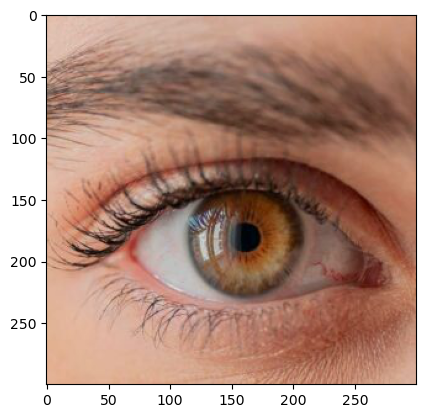

In [24]:
# Helpful function to show an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

show_image('C:\\Users\\elanw\\OneDrive\\Pictures\\eye_square.jpg')

In [26]:
# Helper function to load image from path and preprocess it

from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    img = image_utils.load_img(image_path, target_size=(224,224))
    img = image_utils.img_to_array(img)
    img = img.reshape(1,224,224,3)
    img = preprocess_input(img)
    return img

In [ ]:
# Have tried:
# VGG16 xfer learning
# training with duplicates of each eye flipped
# training with only left and flipped right


#to do:
# retry w/ higher learning rate
# try with different optimizer (Adam? SGD?)

# try base cnn
# try greyscale images
# try base dnn?
# try with more data
# try with resnet
# try with yolo
# svm
# resnet
# imagesize?
# eliminate single color channel
# try with different loss function
# try with binary prediction of single diease
# predict both and use that to predict diseased
# verify testing data isn't that different? getting very different score for validation vs test